# Anotaciones en imágenes 

Funciones básicas para graficar líneas, círculos y texto

In [47]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
# %matplotlib qt

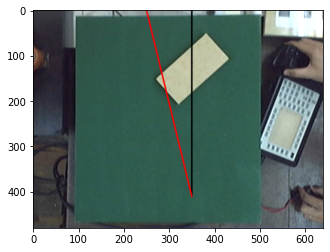

In [94]:
img = cv.imread('imgBloque1.bmp')
start = (350, 0)
end = (350, 410)
# Dibujo una línea
# line(imagen,inicio,fin,color,ancho_linea,tipo_linea)
cv.line(img, start, end, (0,0,0), 2, cv.LINE_AA)
cv.line(img, (250, 0), end, (0, 0, 255), 2, cv.LINE_AA)
plt.imshow(img[...,::-1])


#### Tipos de líneas
Filled: cv.FILLED
4-connected line: cv.LINE_4 
8-connected line: cv.LINE_8
Antialiased line: cv.LINE_AA
	
#### Explorar las posibilidades y buscar una explicación a las diferencias

## Son distintos algoritmos para hacer las lineas. Las lineas AA son mejores para curvas y letras. Tambien line 4 y 8 tienen distinto grosor. Filled si es usado en figuras cerradas las rellena.

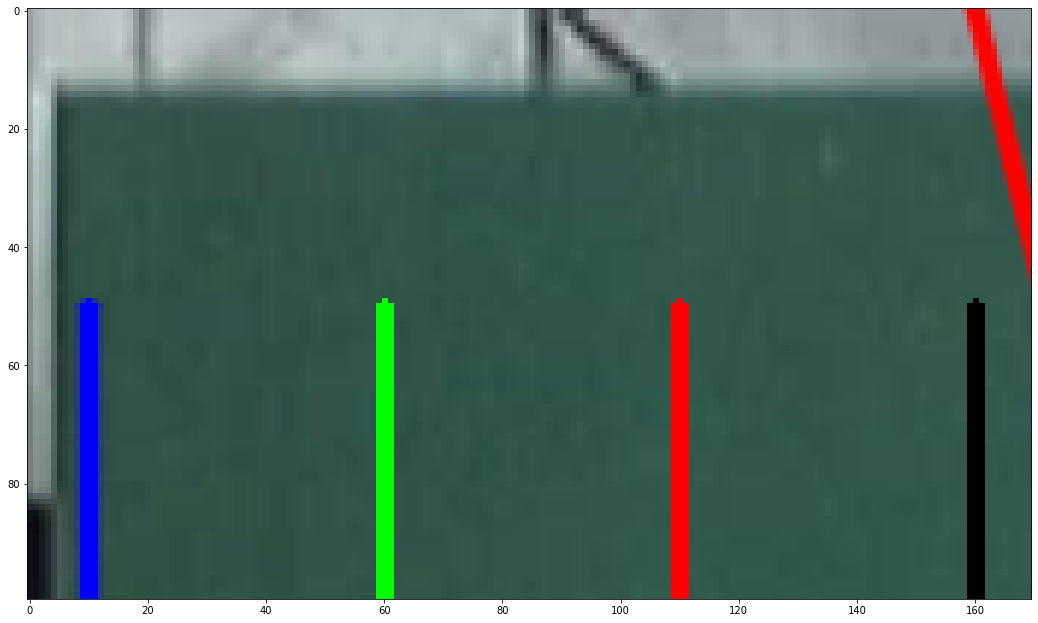

In [49]:
img_copy = img.copy()
cv.line(img_copy, (250, 50), (250, 410), (0,0,0), 2, cv.FILLED)
cv.line(img_copy, (200, 50), (200, 410), (0, 0, 255), 2, cv.LINE_4)
cv.line(img_copy, (150, 50), (150, 410), (0,255,0), 2, cv.LINE_8)
cv.line(img_copy, (100, 50), (100, 410), (255, 0, 0), 2, cv.LINE_AA)
fig, ax = plt.subplots(figsize=(18, 18))
img_cropped = img_copy[0:100, 90:260, :]
ax.imshow(img_cropped[...,::-1])

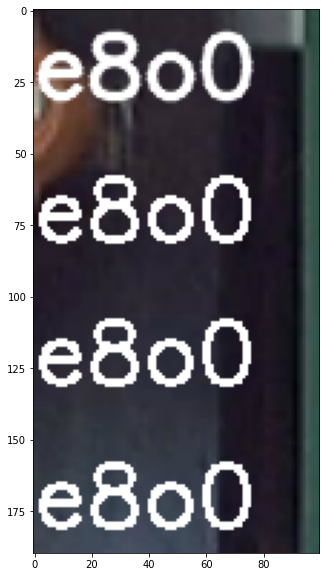

In [72]:
img_copy = img.copy()
font = cv.FONT_HERSHEY_SIMPLEX
# Probando con un texto con curvas.
cv.putText(img_copy,'e8o0',(0, 100), font, 1,(255,255,255),2,cv.LINE_AA)
cv.putText(img_copy,'e8o0',(0, 150), font, 1,(255,255,255),2,cv.FILLED)
cv.putText(img_copy,'e8o0',(0, 200), font, 1,(255,255,255),2,cv.LINE_4)
cv.putText(img_copy,'e8o0',(0, 250), font, 1,(255,255,255),2,cv.LINE_8)
fig, ax = plt.subplots(figsize=(10,10))
img_cropped = img_copy[70:260, 0:100, :]
ax.imshow(img_cropped[...,::-1])

#### Ejercicio:
Dibujar rectángulos (cv.rectangle)
elipses (cv.ellipse)
círculos (cv.circle)
polígonos (cv.polylines)

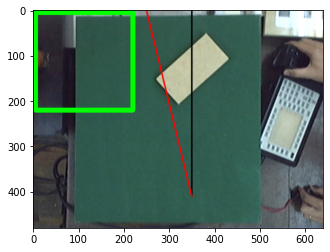

In [87]:
img_copy = img.copy()
start_point = (5, 5)
end_point = (220, 220)
color = (0, 255, 0)
thickness = 10
img_copy = cv.rectangle(img_copy, start_point, end_point, color, thickness)
plt.imshow(img_copy[...,::-1])

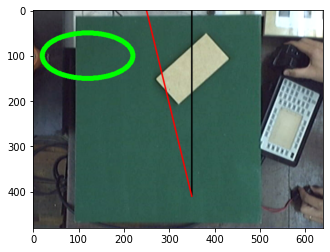

In [88]:
img_copy = img.copy()
center_coordinates = (120, 100)
axesLength = (100, 50)
angle = 0  
startAngle = 0
endAngle = 360
img_copy = cv.ellipse(img_copy, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness)
plt.imshow(img_copy[...,::-1])

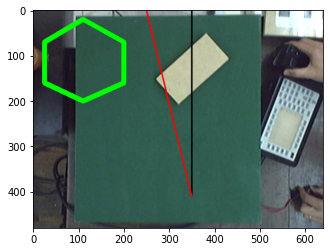

In [91]:
img_copy = img.copy()
pts = np.array([[25, 70], [25, 160],
                [110, 200], [200, 160],
                [200, 70], [110, 20]],
               np.int32)
pts = pts.reshape((-1, 1, 2))
isClosed = True
img_copy = cv.polylines(img_copy, [pts], isClosed, color, thickness)
plt.imshow(img_copy[...,::-1])

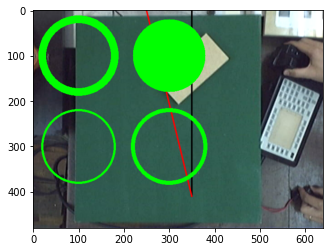

In [93]:
img_copy = img.copy()
radius = 80
cv.circle(img_copy, (100,100), radius, color, cv.LINE_AA)
cv.circle(img_copy, (300,100), radius, color, cv.FILLED)
cv.circle(img_copy, (100,300), radius, color, cv.LINE_4)
cv.circle(img_copy, (300,300), radius, color, cv.LINE_8)
plt.imshow(img_copy[...,::-1])

#### Ejercicio:
Mostrar una versión en tonos de grises de la imagen con una línea roja dibujada

In [113]:
# TODO: LOL si me sobra tiempo lo hago
# img = cv.imread('imgBloque1.bmp')
# img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# start = (350, 50)
# end = (350, 410)
# color = (0,0,255)
# cv.line(img_gray, start, end, color, thickness, cv.LINE_AA)
# plt.imshow(img_copy) #, cmap='gray', vmin=0, vmax=255)

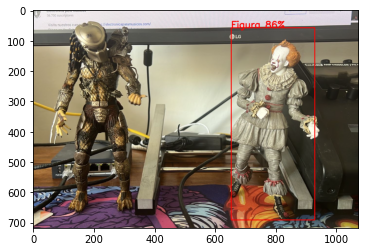

In [111]:
# Escribo texto en la imagen
# cv.putText(imagen,texto,posicion,fuente,escala,color,espesor,tipo_linea)
img = cv.imread('it_predator.png')

bbox_start = (652, 58)
bbox_end = (927, 690)
cv.rectangle(img, bbox_start, bbox_end, (0,0,255),2)
cv.putText(img,'Figura 86%', bbox_start, cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv.LINE_AA)
plt.imshow(img[...,::-1])
plt.show()

### Ajuste de texto a una ROI

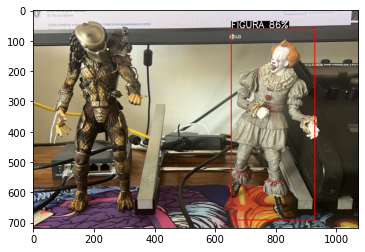

In [112]:
img = cv.imread('it_predator.png')

label = 'FIGURA 86%'
(label_width, label_height), _ = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 1, 2)
text_end = (bbox_start[0] + label_width, bbox_start[1] - label_height)

cv.rectangle(img, bbox_start, bbox_end, (0,0,255),2)
cv.rectangle(img, bbox_start, text_end, (0,0,0),-1)
cv.putText(img, label, bbox_start, cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(img[...,::-1])
plt.show()